## Hankel matrix

Which is the fastest way to compute the Hankel matrix?

**Reference**: https://ieeexplore.ieee.org/document/8718360

In [1]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view as swv

from plot_machinery.plot import data, kernel, plot, repeat_count

In [2]:
@kernel("numpy")
def numpy_version(X, d):
    n_ho_snapshots = X.shape[1] - d + 1

    idxes = np.repeat(np.arange(d)[None], repeats=n_ho_snapshots, axis=0)
    idxes += np.arange(n_ho_snapshots)[:, None]
    return X.T[idxes].reshape(-1, X.shape[0] * d).T


@kernel("numpy2")
def numpy_version2(X, d):
    n_ho_snapshots = X.shape[1] - d + 1

    idxes = np.repeat(np.arange(d)[None], repeats=n_ho_snapshots, axis=0)
    idxes += np.arange(n_ho_snapshots)[:, None]
    return np.swapaxes(X[:, idxes], 1, 2).reshape(-1, X.shape[0] * d, order="F").T


@kernel("numpy3")
def numpy_version3(X, d):
    n_ho_snapshots = X.shape[1] - d + 1

    idxes = np.repeat(np.arange(d)[None], repeats=n_ho_snapshots, axis=0)
    idxes += np.arange(n_ho_snapshots)[:, None]
    return np.swapaxes(X[:, idxes], 0, 1).reshape(-1, X.shape[0] * d).T


@kernel("numpy4")
def numpy_version4(X, d):
    n_ho_snapshots = X.shape[1] - d + 1

    idxes = np.repeat(np.arange(d)[None], repeats=n_ho_snapshots, axis=0)
    idxes += np.arange(n_ho_snapshots)[:, None]
    idxes = idxes.flatten()
    return np.swapaxes(X[:, idxes], 0, 1).reshape(-1, X.shape[0] * d).T


@kernel("numpy5")
def numpy_version5(X, d):
    n_ho_snapshots = X.shape[1] - d + 1

    idxes = np.repeat(np.arange(d)[None], repeats=n_ho_snapshots, axis=0)
    idxes += np.arange(n_ho_snapshots)[:, None]
    return X[:, idxes.flatten()].reshape(X.shape[0] * d, -1, order="F")


@kernel("stride")
def stride_version(X, d):
    n_ho_snapshots = X.shape[1] - d + 1
    return swv(X, (X.shape[0], d))[0].reshape(n_ho_snapshots, -1, order="F").T


@kernel("stride2")
def stride_version2(X, d):
    n_ho_snapshots = X.shape[1] - d + 1
    return swv(X.T, (d, X.shape[0]))[:, 0].reshape(n_ho_snapshots, -1).T


@kernel("python")
def python_list_version(X, d):
    return np.concatenate(
        [X[:, i : X.shape[1] - d + i + 1] for i in range(d)],
        axis=0,
    )

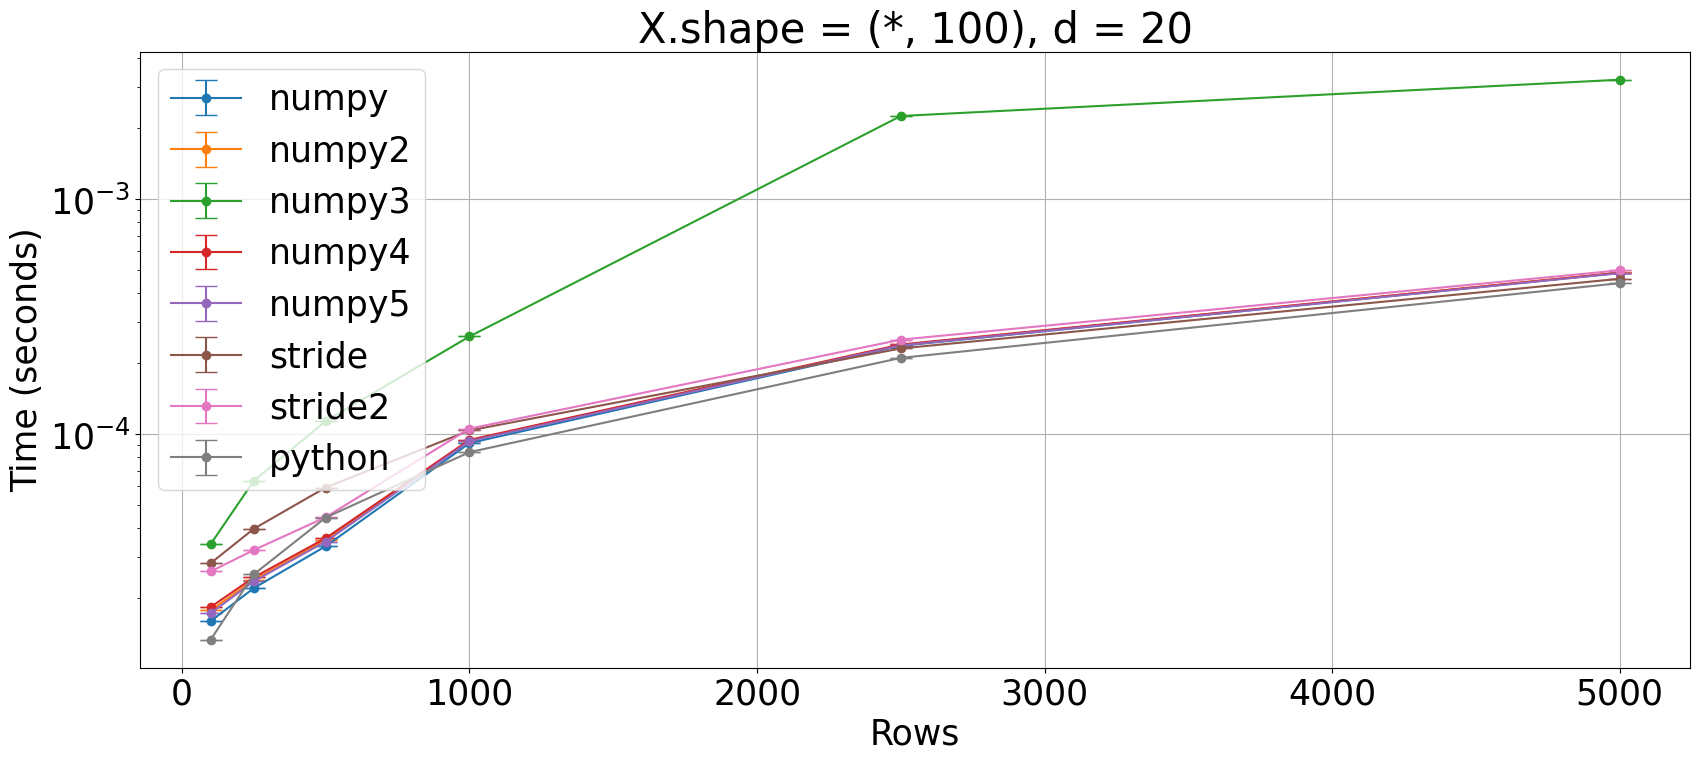

In [3]:
@data(steps=[100, 250, 500, 1000, 2500, 5000])
def scale_rows(n):
    return np.ones((n, 25)), 5


plot(logx=False, logy=True, xlabel="Rows", title="X.shape = (*, 100), d = 20")

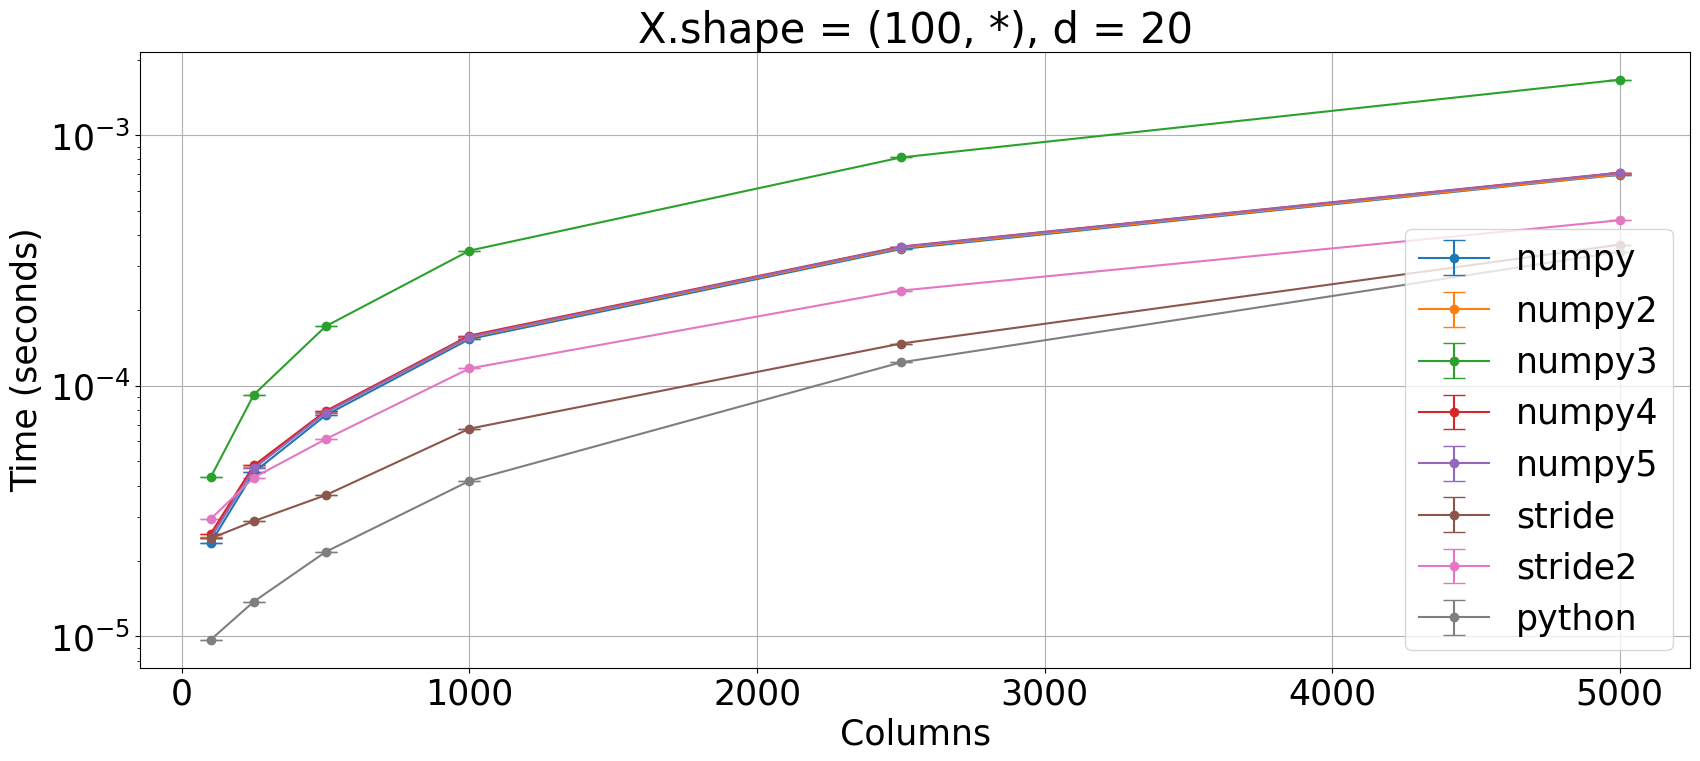

In [4]:
@data(steps=[100, 250, 500, 1000, 2500, 5000])
def scale_columns(n):
    return np.ones((25, n)), 5


plot(logx=False, logy=True, xlabel="Columns", title="X.shape = (100, *), d = 20")

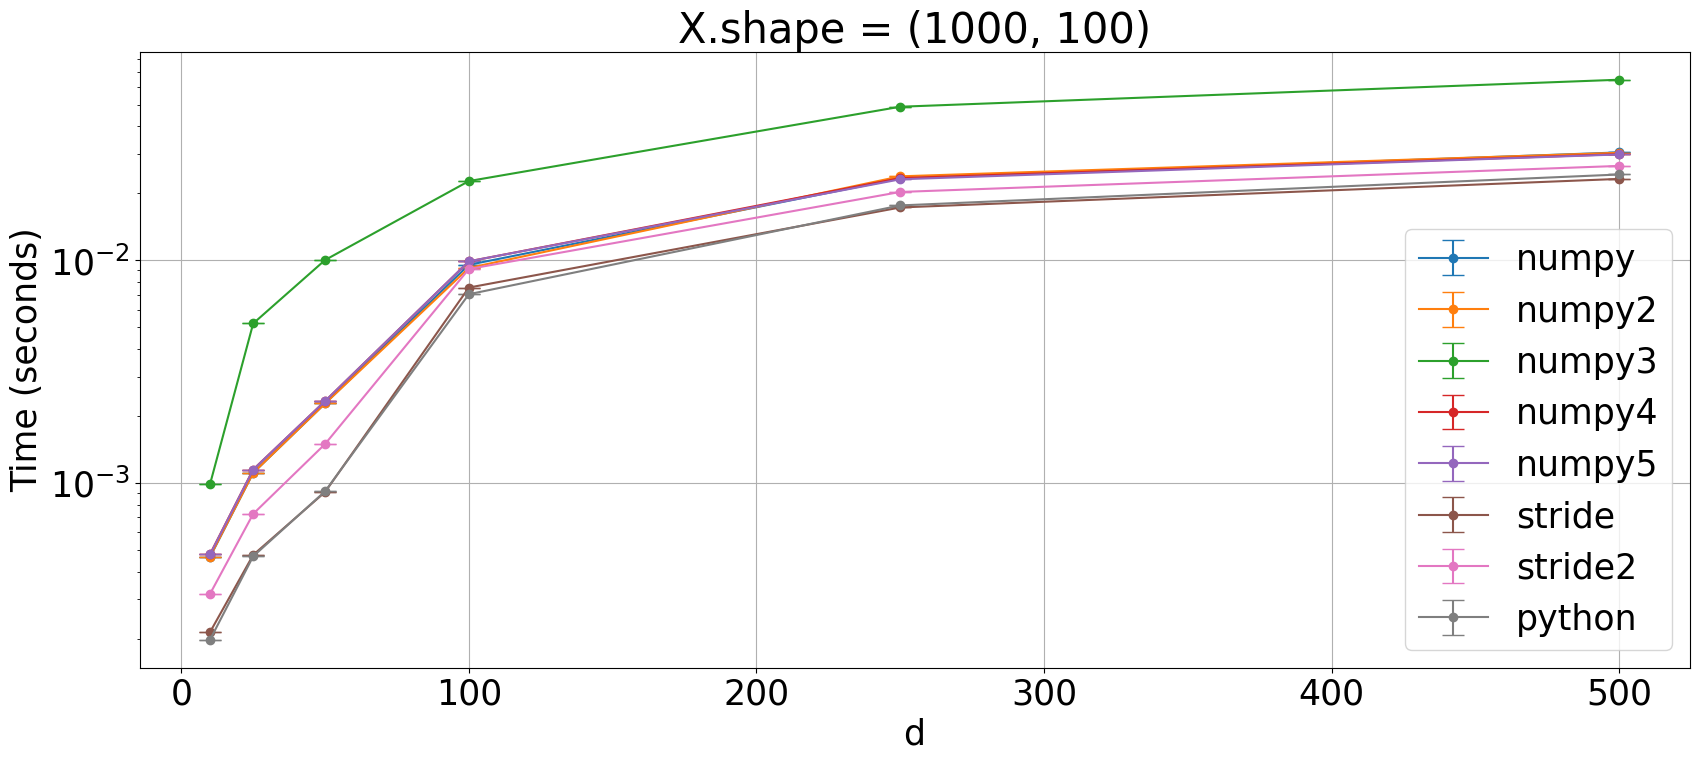

In [5]:
@data(steps=[10, 25, 50, 100, 250, 500])
def scale_d(n):
    return np.ones((50, 1000)), n


plot(logx=False, logy=True, xlabel="d", title="X.shape = (1000, 100)")